In [653]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_rows', None)

In [654]:
#!ls -1 #Jupyter Notebook
!dir #VSCODE


 O volume na unidade C � Windows

Arquivo n�o encontrado



 O N�mero de S�rie do Volume � 0676-E265

 Pasta de c:\Users\henri\OneDrive\Documents\FIAP\3exemplo_dados_vendas_eletrodomesticos



In [655]:
df_original = pd.read_csv('exemplo_dados_vendas_eletrodomesticos.csv')
df = df_original

In [656]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cd_produto    4581 non-null   int64  
 1   qtde          4581 non-null   int64  
 2   nota          4581 non-null   int64  
 3   preco_liq     4581 non-null   float64
 4   preco_ipi     4581 non-null   float64
 5   preco_icms    4581 non-null   float64
 6   p_ipi         4581 non-null   int64  
 7   p_icm         4581 non-null   int64  
 8   nm_produto    4581 non-null   object 
 9   cd_cliente    4581 non-null   float64
 10  nm_cliente    4581 non-null   object 
 11  cidade        4581 non-null   object 
 12  uf            4581 non-null   object 
 13  cd_vendedor   4581 non-null   int64  
 14  nm_vendedor   4581 non-null   object 
 15  cd_familia    4581 non-null   int64  
 16  nm_familia    4581 non-null   object 
 17  cd_grupo      4581 non-null   int64  
 18  nm_grupo      4581 non-null 

In [ ]:
df['cd_vendedor'].value_counts()

### EDA

In [657]:
# Calculando o lucro bruto por venda
#df['lucro_por_venda'] = df['valor'] - (df['preco_liq'] + df['preco_ipi'] + df['preco_icms'])
#ERROR print(df[['lucro', 'lucro_por_venda']])

#df['nota'].value_counts().sum()

print(df['nm_operacao'].value_counts().sum())
print("produtos vendidos:", df[df['nm_operacao'] == 'VENDAS']['nota'].value_counts().sum())
itens_por_pedido = df.groupby('nota')['cd_produto'].count()
print("Número de vendas:", itens_por_pedido.value_counts().sum())

4581
produtos vendidos: 2433
Número de vendas: 2911


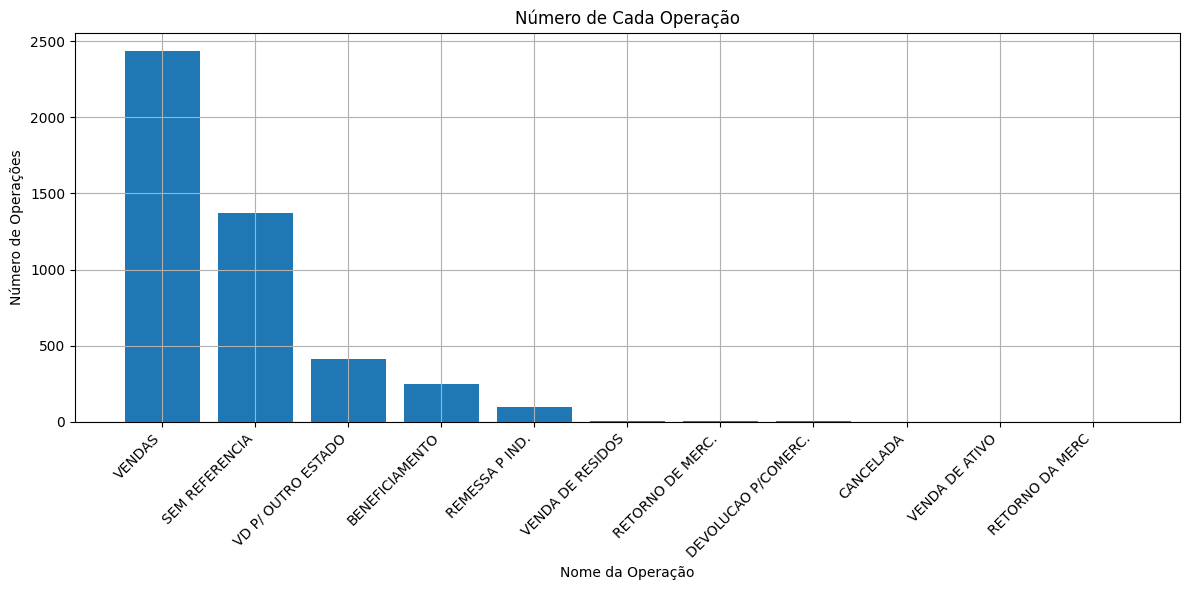

nm_operacao
VENDAS                 2433
SEM REFERENCIA         1373
VD P/ OUTRO ESTADO      414
BENEFICIAMENTO          245
REMESSA P IND.           99
VENDA DE RESIDOS          6
RETORNO DE MERC.          5
DEVOLUCAO P/COMERC.       3
CANCELADA                 1
VENDA DE ATIVO            1
RETORNO DA MERC           1
Name: count, dtype: int64


In [658]:
aa = df['nm_operacao'].value_counts()
plt.figure(figsize=(12, 6))

plt.bar(aa.index, aa.values)
plt.xlabel("Nome da Operação")
plt.ylabel("Número de Operações")
plt.title('Número de Cada Operação')
plt.grid(alpha=1)
plt.xticks(rotation=45, ha="right")  # Rotaciona os rótulos em 45 graus e alinha à direita
plt.tight_layout()  # Ajusta o layout para evitar sobreposição

plt.show()
print(df['nm_operacao'].value_counts())

In [659]:
print(df['cd_operacao'].value_counts())

cd_operacao
5.102    2434
9.999    1373
6.102     414
5.901     245
5.924      99
5.949       6
5.903       5
5.202       3
0.000       1
5.913       1
Name: count, dtype: int64


### 'cd_operacao' e 'nm_operacao' representam a mesma coisa

cada tipo de operação com base nos nomes das operações:

VENDAS: Indica uma venda padrão, ou seja, um produto foi vendido ao cliente final dentro do mesmo estado. Essa operação é a mais comum e representa a maioria das transações.


SEM REFERENCIA: Refere-se a uma operação sem uma classificação específica ou desconhecida. Pode envolver transações atípicas ou de natureza administrativa, onde não foi designada uma categoria exata.


VD P/ OUTRO ESTADO: "Venda para Outro Estado". Esta operação ocorre quando a venda é realizada para um cliente em um estado diferente. Geralmente, transações entre estados podem ter implicações fiscais, como alíquotas de ICMS (Imposto sobre Circulação de Mercadorias e Serviços) diferenciadas.


BENEFICIAMENTO: Refere-se a operações de beneficiamento, que envolvem o envio de mercadorias para serem melhoradas, processadas ou tratadas antes de serem vendidas ou devolvidas ao inventário.


REMESSA P IND.: "Remessa para Industrialização". Significa que o produto é enviado a uma empresa de industrialização, para receber processamento adicional antes de ser vendido ou devolvido.


VENDA DE RESÍDUOS: Indica a venda de resíduos ou sobras de materiais, provavelmente provenientes de processos de fabricação ou industrialização.


RETORNO DE MERCADORIA: Refere-se a produtos que foram enviados para fora da empresa (por exemplo, para beneficiamento ou industrialização) e estão sendo devolvidos ao estoque.


DEVOLUÇÃO PARA COMÉRCIO: Indica uma devolução feita pelo cliente final ou por um comerciante. Pode ocorrer por vários motivos, como defeito no produto ou insatisfação do cliente.


CANCELADA: Representa uma operação de venda que foi cancelada. Isso significa que a transação foi anulada e não houve entrega do produto.


VENDA DE ATIVO: Essa operação se refere à venda de um ativo da empresa (e não de um produto destinado a clientes). Pode incluir máquinas, equipamentos, móveis, ou outros itens que fazem parte do patrimônio.


RETORNO DA MERCADORIA: Similar ao "RETORNO DE MERCADORIA", mas o nome sugere que se trata de uma devolução de produtos que retornam ao estoque após serem enviados a algum cliente ou para outro destino.

In [660]:
#Outlier de data 1907?
datas_ordenadas = df['data_pedido'].sort_values().unique()
print(datas_ordenadas)
df = df[df['data_pedido'] != '1907-01-11 00:00:00']

['1907-01-11' '2006-12-14' '2006-12-18' '2006-12-21' '2006-12-27'
 '2007-01-08' '2007-01-16' '2007-01-18' '2007-01-22' '2007-01-24'
 '2007-01-29' '2007-01-30' '2007-02-06' '2007-02-08' '2007-02-15'
 '2007-02-16' '2007-02-22' '2007-02-26' '2007-02-27' '2007-03-06'
 '2007-03-08' '2007-03-12' '2007-03-14' '2007-03-15' '2007-03-16'
 '2007-03-19' '2007-03-20' '2007-03-22' '2007-03-27' '2007-04-03'
 '2007-04-04' '2007-04-10' '2007-04-16' '2007-04-18' '2007-04-19'
 '2007-04-23' '2007-05-03' '2007-05-11' '2007-05-14' '2007-05-15'
 '2007-05-16' '2007-05-17' '2007-05-21' '2007-05-24' '2007-05-29'
 '2007-06-04' '2007-06-05' '2007-06-18' '2007-06-21' '2007-06-25'
 '2007-06-26' '2007-06-29' '2007-07-03' '2007-07-04' '2007-07-05'
 '2007-07-11' '2007-07-16' '2007-07-31' '2007-08-08' '2007-08-13'
 '2007-08-16' '2007-08-20' '2007-08-21' '2007-08-23' '2007-08-27'
 '2007-09-03' '2007-09-06' '2007-09-11' '2007-09-12' '2007-09-20'
 '2007-09-24' '2007-09-27' '2007-10-01' '2007-10-04' '2007-10-05'
 '2007-10-

In [661]:
#A coluna 'nota' é o código da compra, "nota fiscal"
#print(orders['order_id'].value_counts())
#print(orders['order_hour_of_day'].unique())
#print(df['nota'].value_counts())
#df[df['nm_familia'] == 'NETBOOK'].head()

In [662]:
df['cidade'].value_counts()

cidade
SAO PAULO               1857
BOITUVA                  331
GUARULHOS                246
S.B C                    165
BRAGANCA PAULISTA        127
SOROCABA                 123
CAMPINAS                 103
COTIA                     96
SANTO ANDRE               91
SAO BERNARDO DO CAMP      89
AMERICANA                 78
JANDIRA CX.P.13           75
ITU                       70
PARANAMIRIM               69
TAUBATE                   59
DIADEMA                   58
INDAIATUBA                57
JOINVILLE                 53
IBIPORA                   46
S.JOSE DOS PINHAIS        45
CAMPO LARGO               42
GUARAREMA                 39
ITAQUAQUECETUBA           37
RIBEIRAO PRETO            37
CARAMBEI                  35
MOGI DAS CRUZES           31
JUNDIAI                   31
FORMIGA                   28
SAO CARLOS                25
RIO DE JANEIRO            23
SUZANO                    21
ARAGUAINA                 21
JABOTICABAL               19
CRICIUMA                  19
VARGEM 

In [663]:
df['uf'].value_counts()

uf
SP    4102
PR     182
SC      75
RN      69
MG      48
RJ      27
TO      22
MT      18
RS      13
ES      10
DF       9
PE       2
S        2
GO       1
7        1
Name: count, dtype: int64

In [664]:
df['nm_familia'].value_counts()

nm_familia
ELETRODOMESTICOS DE COZINHA    791
NETBOOK                        703
IPAD                           484
APARELHOS DE AR                382
LINHA BRANCA                   306
TV                             291
SMARTFONE                      272
MICRO-COMPUTADOR               247
NOTEBOOK                       237
INTEGRADOS                     234
RADIOS                         219
CELULAR                        217
TELEFONE FIXO ANTIGO           198
Name: count, dtype: int64

In [665]:
#maior parte dos clientes são pessoas juridicas
#df com os principais clientes, que comprou mais de 50 produtos
df_pessoa = df['nm_cliente'].value_counts()
df_pessoa = df_pessoa[df_pessoa > 50]
print(df_pessoa.head(20))

for cliente, contagem in df_pessoa.items():
    print(f'Cliente: {cliente}, Contagem: {contagem}')

nm_cliente
ACE SCHMERSAL ELETROELETRONICA INDUSTRIAL LTDA.      331
SULZER BRASIL S/A                                    165
ARNO S/A                                             141
ARTHUR KLINK METALURGICA LTDA.                       121
ALCOA ALUMINIO S/A                                    96
FABRICA DE FOGOES E SERRALHERIA CHINA LTDA            96
MARCENARIA E REFRIGERACAO LTDA                        89
ESCOMAG IND. COM. E POLIMENTOS DE METAIS LTDA         88
INDUSTRIA DE PLASTICOS ESTRELA DOURADA LTDA           80
FIBRA S/A.                                            78
R.A. DE MELO REFRIGERACAO LTDA                        76
ACOTECNICA S/A                                        75
JJ & CIA BELLA LTDA                                   73
CORT-TEC FERRAMENTAS LTDA                             72
MAPRI-TEXTRON DO BRASIL LTDA                          71
BONOR IND. DE BOTOES DO NORDESTE S/A                  69
BUTUEM INDUSTRIA DE AUTO PECAS LTDA.                  68
CONSISTEC CONTROLES 

In [666]:
#principal cliente que comprou mais coisas "331" e têm "248" compras, futura outlier
df_ace = df[df['nm_cliente'] == 'ACE SCHMERSAL ELETROELETRONICA INDUSTRIAL LTDA.']
print(df_ace['nm_familia'].value_counts())
print(df_ace)

nm_familia
ELETRODOMESTICOS DE COZINHA    153
NETBOOK                         69
APARELHOS DE AR                 35
SMARTFONE                       12
IPAD                            11
TV                              10
CELULAR                          9
MICRO-COMPUTADOR                 8
RADIOS                           7
LINHA BRANCA                     7
NOTEBOOK                         5
INTEGRADOS                       3
TELEFONE FIXO ANTIGO             2
Name: count, dtype: int64
      cd_produto  qtde  nota  preco_liq  preco_ipi  preco_icms  p_ipi  p_icm  \
12          2817     4     6    1352.16    1446.81     1707.24      7     18   
24          2817     1    12    1352.16    1446.81     1707.24      7     18   
50          2817     1    29    1352.16    1446.81     1707.24      7     18   
60          2817     1    36    1352.16    1446.81     1707.24      7     18   
61          3319     2    36    1593.12    1640.91     1936.28      3     18   
79          2817     1    47

### Modificando o df para nos aprofundarmos na análise 

In [667]:
# Função para adicionar coluna de mês e ano
def adicionar_mes_ano(df, coluna_data):
    # Verifica se a coluna de data está no formato datetime
    if not pd.api.types.is_datetime64_any_dtype(df[coluna_data]):
        df[coluna_data] = pd.to_datetime(df[coluna_data])  # Converte a coluna para o tipo datetime
    
    # Extrai o ano e o mês como uma nova coluna 'mes_ano'
    df['mes_ano'] = df[coluna_data].dt.to_period("M")
    return df

# Adicionar coluna de mês e ano
df = adicionar_mes_ano(df, 'data_pedido')

In [668]:
# Função para adicionar coluna de dia da semana
def adicionar_dia_da_semana(df, coluna_data):
    # Verifica se a coluna de data está no formato datetime
    if not pd.api.types.is_datetime64_any_dtype(df[coluna_data]):
        df[coluna_data] = pd.to_datetime(df[coluna_data])  # Converte a coluna para o tipo datetime
    
    # Cria a nova coluna 'dia_da_semana' com o nome do dia da semana
    df['dia_da_semana'] = df[coluna_data].dt.day_name()
    return df

# Adicionando a coluna de dia da semana
df = adicionar_dia_da_semana(df, 'data_pedido')

In [669]:
# Define uma lista de famílias de produtos
familias = ['IPAD', 'NETBOOK', 'SMARTFONE', 'MICRO-COMPUTADOR', 'NOTEBOOK', 'CELULAR', 'INTEGRADOS']

# Altera a coluna 'categoria_produto' para 'eletronicos' quando 'nm_familia' está na lista
df.loc[df['nm_familia'].isin(familias), 'categoria_produto'] = 'eletronicos'

# Altera a coluna 'categoria_produto' para 'linha branca' quando 'nm_familia' é 'LINHA BRANCA'
df.loc[df['nm_familia'] == 'LINHA BRANCA', 'categoria_produto'] = 'linha branca'

# Altera a coluna 'categoria_produto' para 'linha marrom' quando 'nm_familia' é 'TV' ou 'RADIOS'
df.loc[df['nm_familia'].isin(['TV', 'RADIOS']), 'categoria_produto'] = 'linha marrom'


df.loc[df['nm_familia'] == 'ELETRODOMESTICOS DE COZINHA', 'categoria_produto'] = 'eletrodomesticos'

df.loc[df['nm_familia'] == 'TELEFONE FIXO ANTIGO', 'categoria_produto'] = 'outros'

df.loc[df['nm_familia'] == 'APARELHOS DE AR', 'categoria_produto'] = 'aparelhos de ar'

# Imprime as colunas relevantes para verificar as alterações
print(df[['nm_familia', 'categoria_produto']].head(20))
print(df[['nm_familia', 'categoria_produto']].value_counts())
df['categoria_produto'].value_counts()

          nm_familia categoria_produto
0       LINHA BRANCA      linha branca
1   MICRO-COMPUTADOR       eletronicos
2       LINHA BRANCA      linha branca
3   MICRO-COMPUTADOR       eletronicos
4         INTEGRADOS       eletronicos
5            NETBOOK       eletronicos
6             RADIOS      linha marrom
7   MICRO-COMPUTADOR       eletronicos
8         INTEGRADOS       eletronicos
9          SMARTFONE       eletronicos
10      LINHA BRANCA      linha branca
11        INTEGRADOS       eletronicos
12           NETBOOK       eletronicos
13              IPAD       eletronicos
14           NETBOOK       eletronicos
15      LINHA BRANCA      linha branca
16           NETBOOK       eletronicos
17                TV      linha marrom
18           NETBOOK       eletronicos
19           NETBOOK       eletronicos
nm_familia                   categoria_produto
ELETRODOMESTICOS DE COZINHA  eletrodomesticos     791
NETBOOK                      eletronicos          703
IPAD                      

categoria_produto
eletronicos         2394
eletrodomesticos     791
linha marrom         510
aparelhos de ar      382
linha branca         306
outros               198
Name: count, dtype: int64

In [670]:
# Adiciona coluna com a data da primeira compra para cada cliente
df['data_primeira_compra'] = df.groupby('cd_cliente')['data_pedido'].transform('min')

# Adiciona coluna com a data da última compra para cada cliente
df['data_ultima_compra'] = df.groupby('cd_cliente')['data_pedido'].transform('max')

# Calcula os dias desde a primeira compra
df['dias_desde_primeira_compra'] = (df['data_pedido'] - df['data_primeira_compra']).dt.days

# Calcula os dias desde a última compra
df['dias_desde_ultima_compra'] = (df['data_pedido'] - df['data_ultima_compra']).dt.days

### Não Perca!

In [671]:
#transformar em comentario, isso "filtra" faz com que somente as vendas estejam no df
dfaa = df

#df.loc[(df['lucro'] > 0) & (df['nm_operacao'] == 'SEM REFERENCIA'), 'nm_operacao'] = 'VENDAS'
#df.loc[(df['lucro'] > 0) & (df['cd_operacao'] == 5.102), 'cd_operacao'] = 9.999

"""df['nm_operacao'] = df['nm_operacao'].replace('SEM REFERENCIA', 'VENDAS')
df['cd_operacao'] = df['cd_operacao'].replace('5.102', '9.999')"""
df = df[df['nm_operacao'] == 'VENDAS']

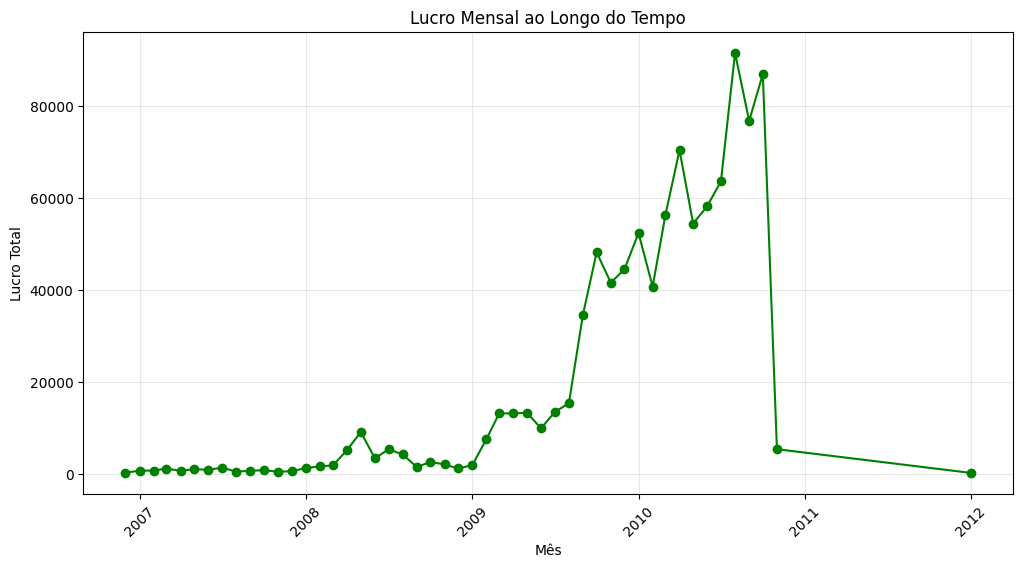

In [672]:
dfaa = dfaa[dfaa['data_pedido'] != '1907-01-11 00:00:00']
# Agrupar o lucro por mês usando a coluna 'mes_ano'
lucro_mensal = dfaa.groupby('mes_ano')['lucro'].sum()

# Converte o índice para o formato datetime, usando o início do mês como referência
lucro_mensal.index = lucro_mensal.index.to_timestamp()

# Criar o gráfico de linha para mostrar o lucro mensal
plt.figure(figsize=(12, 6))
plt.plot(lucro_mensal.index, lucro_mensal.values, marker='o', linestyle='-', color='g')
plt.xlabel("Mês")
plt.ylabel("Lucro Total")
plt.title("Lucro Mensal ao Longo do Tempo")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.show()

### Estudo Vendas

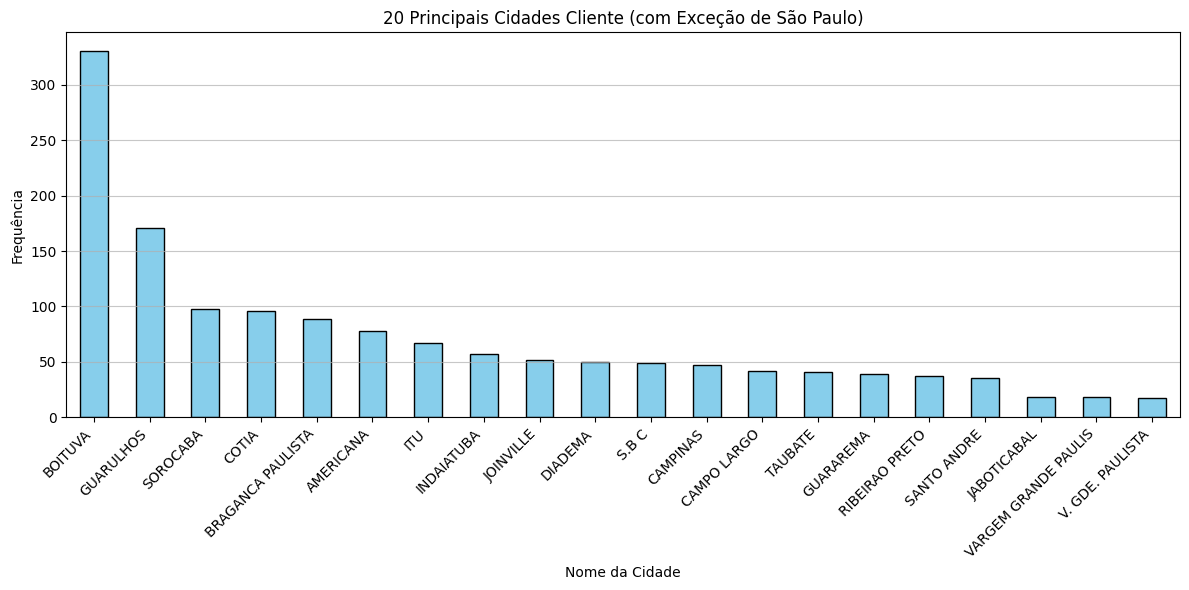

In [673]:
#20 Principais Cidades Cliente (com Exceção de São Paulo)
# Filtra o DataFrame para excluir São Paulo
df_filtrado = df[df['cidade'] != 'SAO PAULO']

# Conta a frequência de cada cidade na coluna 'uf'
cidades_counts = df_filtrado['cidade'].value_counts()

# Seleciona as primeiras 20 cidades
cidades_top_20 = cidades_counts.head(20)

# Cria um gráfico de barras
plt.figure(figsize=(12, 6))
cidades_top_20.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Nome da Cidade')
plt.ylabel('Frequência')
plt.title('20 Principais Cidades Cliente (com Exceção de São Paulo)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

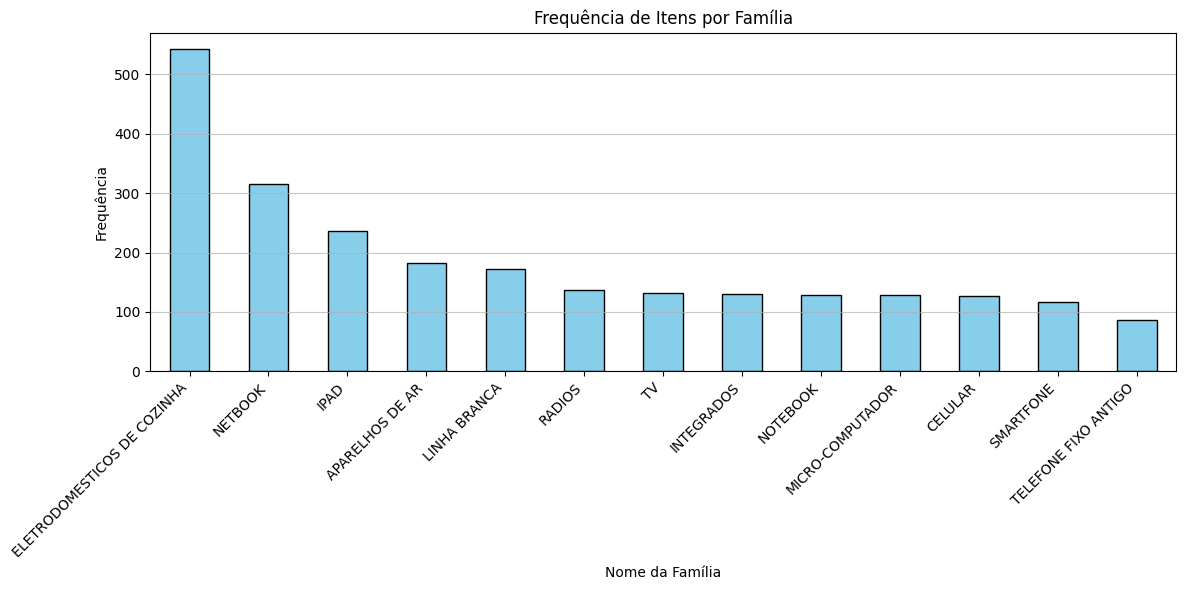

In [674]:
# Conta a frequência de cada categoria na coluna 'nm_familia'
familia_counts = df['nm_familia'].value_counts()

# Cria um gráfico de barras
plt.figure(figsize=(12, 6))
familia_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Nome da Família')
plt.ylabel('Frequência')
plt.title('Frequência de Itens por Família')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

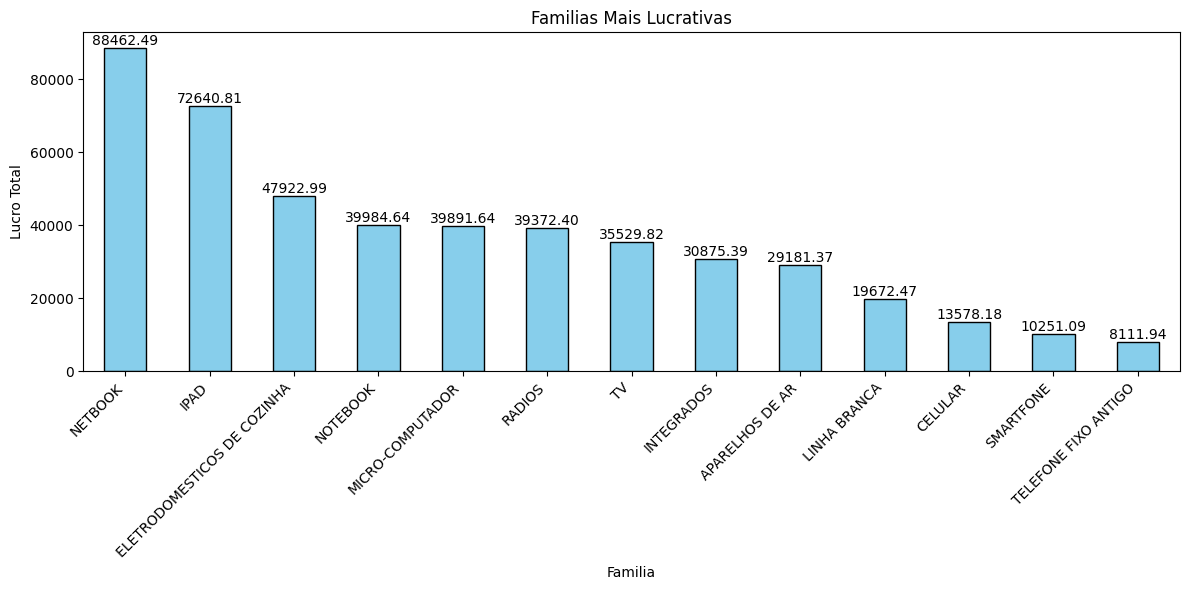

In [675]:
# Agrupa por produto e calcula o lucro total para cada um
lucro_por_produto = df.groupby(['nm_familia'])['lucro'].sum()

# Ordena os produtos pelo lucro em ordem decrescente
produtos_mais_lucrativos = lucro_por_produto.sort_values(ascending=False)

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
produtos_mais_lucrativos.plot(kind='bar', color='skyblue', edgecolor='black')

# Adiciona rótulos e título
plt.xlabel('Familia')
plt.ylabel('Lucro Total')
plt.title('Familias Mais Lucrativas')

# Adiciona os valores de lucro em cima de cada barra
for i, v in enumerate(produtos_mais_lucrativos.values):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Exibe o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

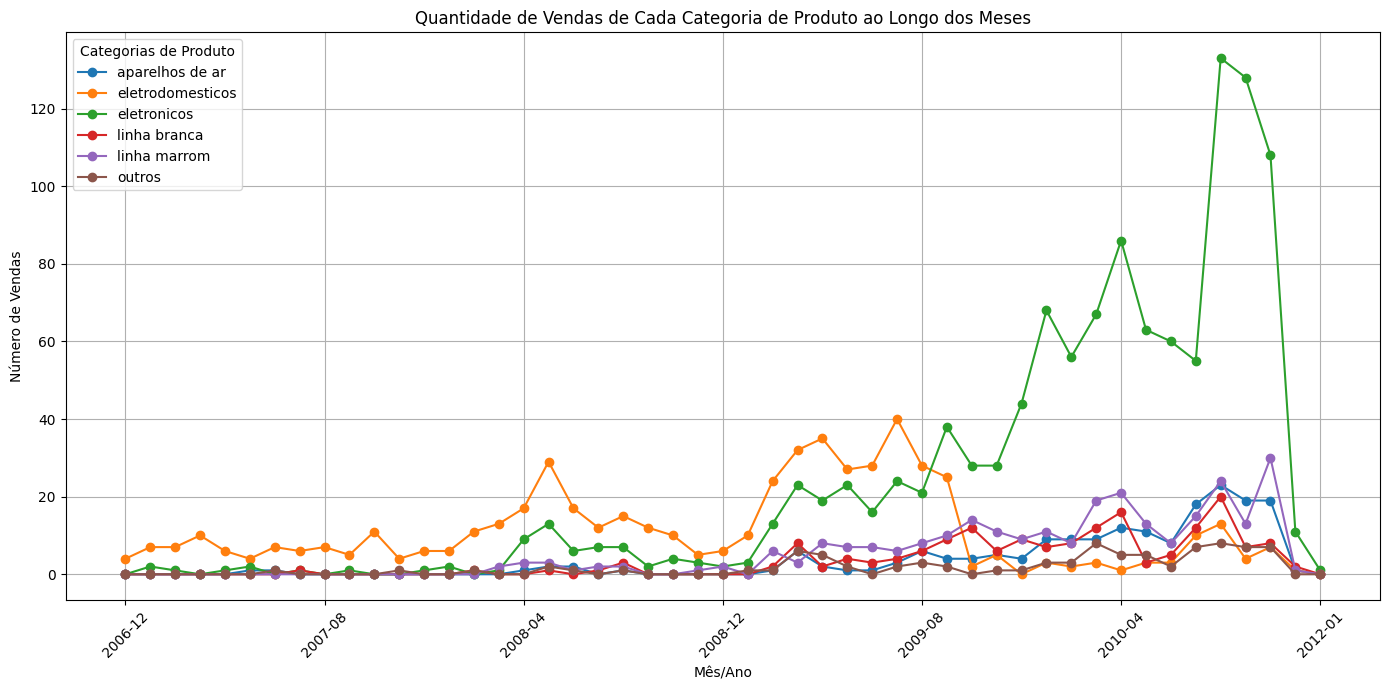

In [676]:
df['data_pedido'] = pd.to_datetime(df['data_pedido'])
df['mes_ano'] = df['data_pedido'].dt.to_period('M')

# Agrupa os dados por mês e categoria de produto, contando as vendas
vendas_por_categoria = df.groupby(['mes_ano', 'categoria_produto'])['nota'].count().unstack(fill_value=0)

# Cria o gráfico de linhas
plt.figure(figsize=(14, 7))
for categoria in vendas_por_categoria.columns:
    plt.plot(vendas_por_categoria.index.astype(str), vendas_por_categoria[categoria], marker='o', label=categoria)

plt.xlabel('Mês/Ano')
plt.ylabel('Número de Vendas')
plt.title('Quantidade de Vendas de Cada Categoria de Produto ao Longo dos Meses')

# Define a quantidade de ticks do eixo X
num_ticks = 6  # Número de ticks que você deseja mostrar
plt.xticks(ticks=range(0, len(vendas_por_categoria.index), max(1, len(vendas_por_categoria.index) // num_ticks)), 
           labels=vendas_por_categoria.index.astype(str)[::max(1, len(vendas_por_categoria.index) // num_ticks)], rotation=45)

plt.legend(title='Categorias de Produto')
plt.grid()
plt.tight_layout()
plt.show()

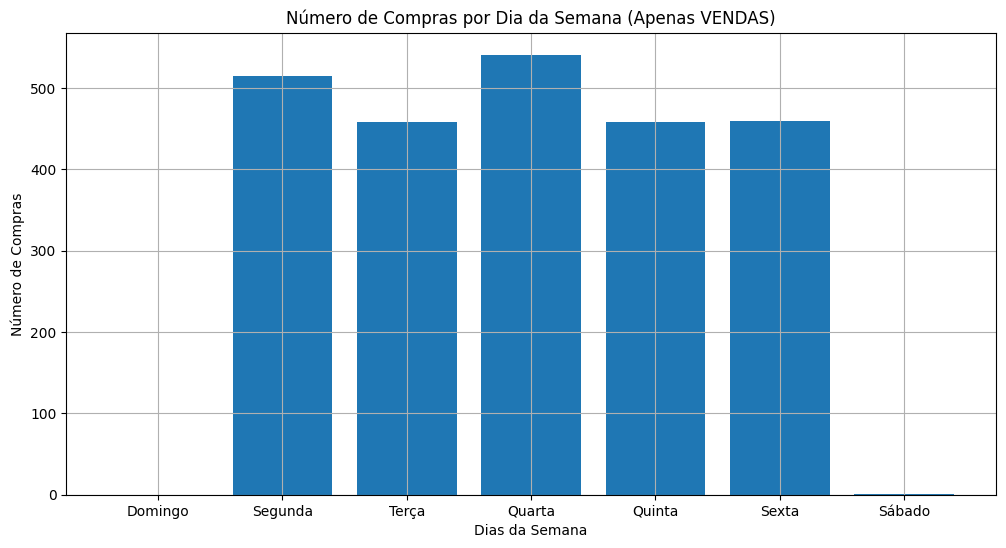

dia_da_semana
Sunday         0.0
Monday       515.0
Tuesday      458.0
Wednesday    541.0
Thursday     458.0
Friday       460.0
Saturday       1.0
Name: nota, dtype: float64


In [677]:
# Em que dia da semana as pessoas fazem compras
dia_da_semana = df.groupby('dia_da_semana')['nota'].count()

# Ordem desejada para os dias da semana
dow_labels = ["Domingo", "Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado"]
dow_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Reordenar o resultado com base na ordem desejada
dia_da_semana = dia_da_semana.reindex(dow_order).fillna(0)  # Preenche valores ausentes com 0

# Plotando
plt.figure(figsize=(12, 6))
plt.bar(dia_da_semana.index, dia_da_semana.values)
plt.xlabel("Dias da Semana")
plt.ylabel("Número de Compras")
plt.title('Número de Compras por Dia da Semana (Apenas VENDAS)')
plt.grid(alpha=1)

# Definindo os rótulos do eixo x
plt.xticks(ticks=range(len(dow_labels)), labels=dow_labels) 

plt.show()
print(dia_da_semana)

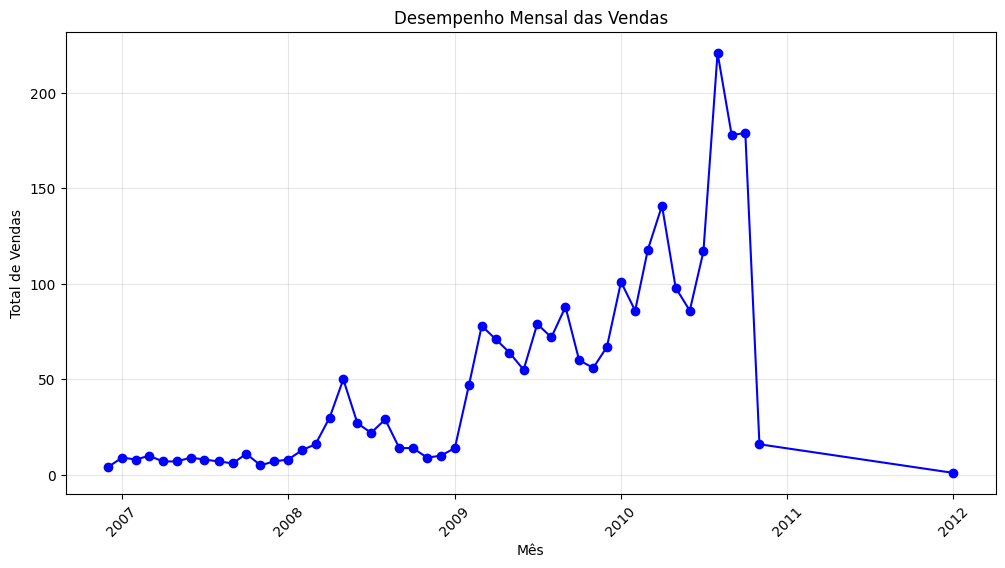

In [678]:
# Agrupar por 'mes_ano' e calcular o total de vendas para cada mês
#vendas_mensais = df.groupby('mes_ano')['valor'].sum()
vendas_mensais = df.groupby('mes_ano')['nota'].count()

# Converter o índice para datetime para facilitar a plotagem
vendas_mensais.index = vendas_mensais.index.to_timestamp()

# Plotando o desempenho das vendas ao longo dos meses
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais.values, marker='o', linestyle='-', color='b')
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.title("Desempenho Mensal das Vendas")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.show()

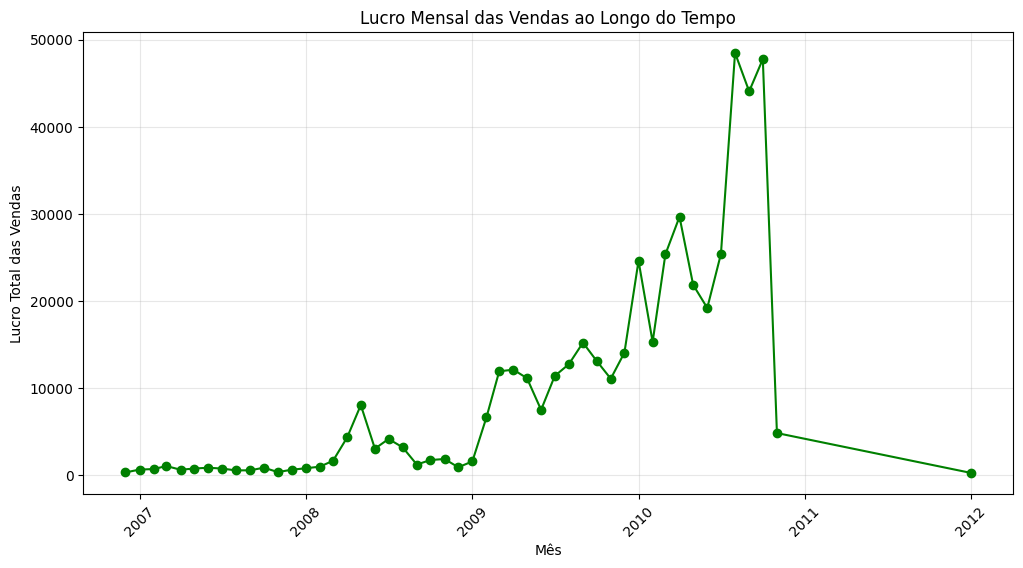

In [679]:
# Agrupar o lucro por mês usando a coluna 'mes_ano'
lucro_mensal = df.groupby('mes_ano')['lucro'].sum()

# Converte o índice para o formato datetime, usando o início do mês como referência
lucro_mensal.index = lucro_mensal.index.to_timestamp()

# Criar o gráfico de linha para mostrar o lucro mensal
plt.figure(figsize=(12, 6))
plt.plot(lucro_mensal.index, lucro_mensal.values, marker='o', linestyle='-', color='g')
plt.xlabel("Mês")
plt.ylabel("Lucro Total das Vendas")
plt.title("Lucro Mensal das Vendas ao Longo do Tempo")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.show()

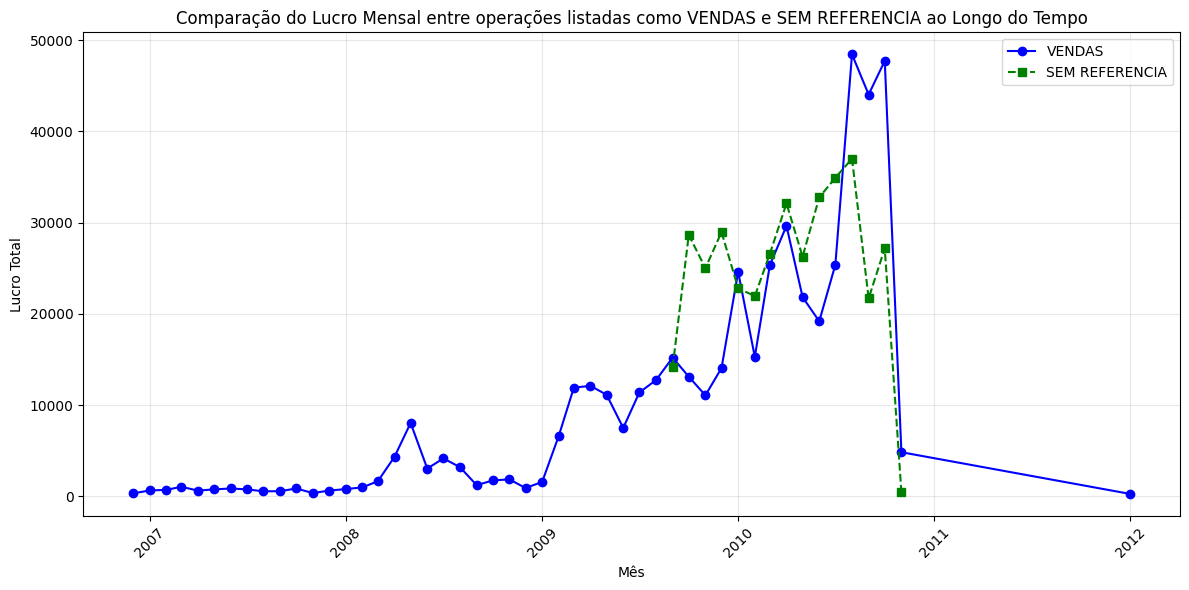

In [680]:

dfaa = dfaa[dfaa['data_pedido'] != '1907-01-11 00:00:00']
dfaa = dfaa[dfaa['nm_operacao'] == 'SEM REFERENCIA']
VENDAS = df
SEM_REFERENCIA = dfaa
# Calcula o lucro mensal para cada DataFrame
#lucro_mensal_df = df.groupby('mes_ano')['lucro'].sum()
#lucro_mensal_df.index = lucro_mensal_df.index.to_timestamp()

lucro_mensal_dfaa = dfaa.groupby('mes_ano')['lucro'].sum()
lucro_mensal_dfaa.index = lucro_mensal_dfaa.index.to_timestamp()

# Cria o gráfico com as duas linhas de lucro mensal
plt.figure(figsize=(12, 6))
plt.plot(lucro_mensal.index, lucro_mensal.values, marker='o', linestyle='-', color='b', label="VENDAS")
plt.plot(lucro_mensal_dfaa.index, lucro_mensal_dfaa.values, marker='s', linestyle='--', color='g', label="SEM REFERENCIA")

# Configurações dos eixos e título
plt.xlabel("Mês")
plt.ylabel("Lucro Total")
plt.title("Comparação do Lucro Mensal entre operações listadas como VENDAS e SEM REFERENCIA ao Longo do Tempo")
plt.legend()  # Adiciona a legenda para distinguir as duas séries
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


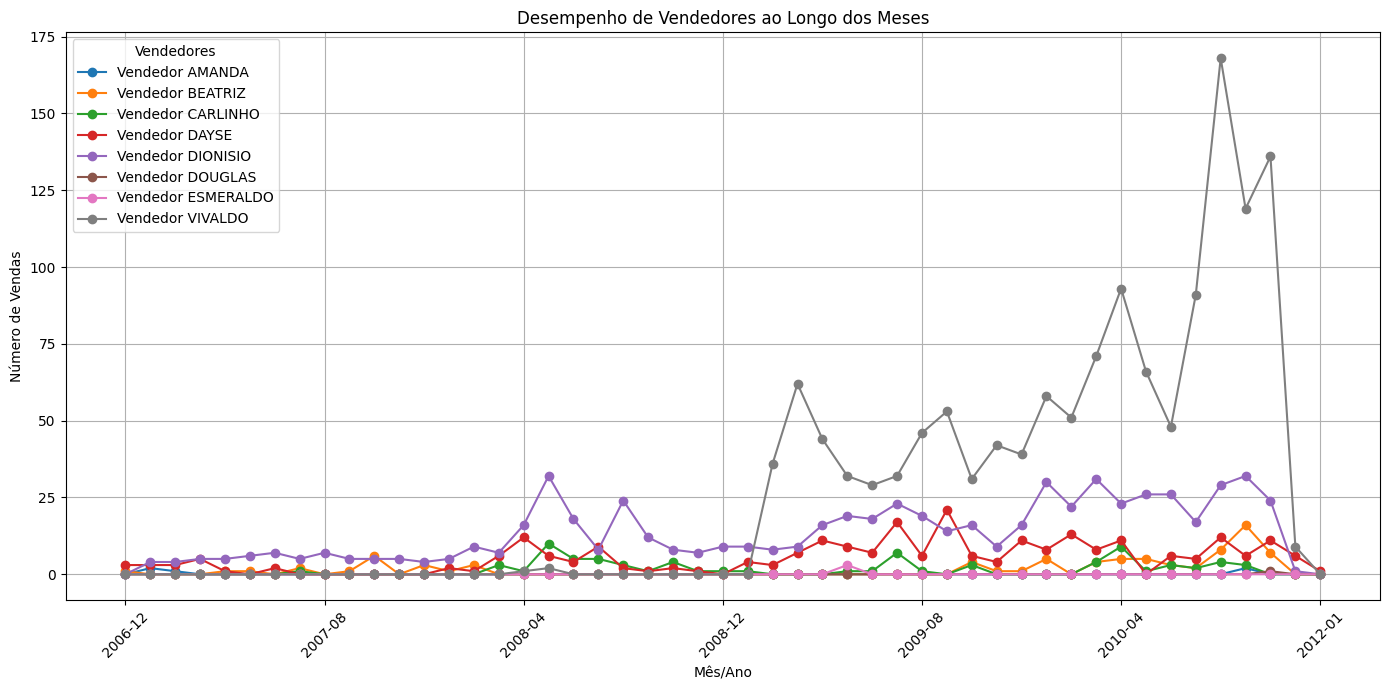

In [681]:
# Agrupa os dados por mês e vendedor
desempenho_vendedores = df.groupby(['mes_ano', 'nm_vendedor'])['nota'].count().unstack(fill_value=0)

# Cria o gráfico de linhas
plt.figure(figsize=(14, 7))
for vendedor in desempenho_vendedores.columns:
    plt.plot(desempenho_vendedores.index.astype(str), desempenho_vendedores[vendedor], marker='o', label=f'Vendedor {vendedor}')

plt.xlabel('Mês/Ano')
plt.ylabel('Número de Vendas')
plt.title('Desempenho de Vendedores ao Longo dos Meses')

# Define a quantidade de ticks do eixo X
num_ticks = 6  # Número de ticks que você deseja mostrar
plt.xticks(ticks=range(0, len(desempenho_vendedores.index), max(1, len(desempenho_vendedores.index) // num_ticks)), 
           labels=desempenho_vendedores.index.astype(str)[::max(1, len(desempenho_vendedores.index) // num_ticks)], rotation=45)

plt.legend(title='Vendedores')
plt.grid()
plt.tight_layout()
plt.show()

In [682]:
# Exibe os 20 produtos mais populares com IDs e nomes
# Agrupa por ID e nome do produto e conta o número de ocorrências
produtos_populares = df.groupby(['cd_produto', 'nm_produto']).size().sort_values(ascending=False)
print(produtos_populares.head(20))
print(produtos_populares.tail(20))


cd_produto  nm_produto                              
5           MOEDORA ARNO Serie 03                       461
2817        MEDIA LEMBRANCA MICROLIXO Serie 84          143
3319        VENTOSO VENTILVA Serie 35                    81
3819        MUITA LEMBRANCA GRAMPOLA Serie 85            63
3317        CELULAR TECLADO Motorola Serie 34            49
2818        ALGUMA LEMBRANCA ITAUTEC Serie 85            45
1748        ATE 50 LITROS PRADARIA Serie 78              45
3822        COM RELOGIO CONSORTE FUNCA Serie 85          38
3321        ATE 20 LITROS BRASTEMP Serie 35              36
3823        CELULAR COM MP3+MP3+MP3+TV Nokia Serie 8     35
3318        PRETO DO BISAVO TELESP Serie 35              33
1749        MUITA LEMBRANCA IMPERION Serie 78            32
2962        IMAGEM NORMAL MONTVELHO Serie 99             30
4819        MEDIA LEMBRANCA SISNE Serie 85               30
3818        MEDIA LEMBRANCA VIVALDA Serie 85             30
3961        MEDIA LEMBRANCA SISNE Serie 99     

In [683]:
"""ids_produtos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df_vendedor = df[df['cd_produto'].isin(ids_produtos)]  # Usando .isin() para filtrar
df_vendedor = df_vendedor[df_vendedor['nm_operacao'] == 'VENDAS']
# Agrupando e contando os vendedores
vendedores_contagem = df_vendedor['cd_vendedor'].value_counts()
print(vendedores_contagem)
df[['nm_vendedor', 'cd_vendedor']].value_counts()"""

"ids_produtos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]\ndf_vendedor = df[df['cd_produto'].isin(ids_produtos)]  # Usando .isin() para filtrar\ndf_vendedor = df_vendedor[df_vendedor['nm_operacao'] == 'VENDAS']\n# Agrupando e contando os vendedores\nvendedores_contagem = df_vendedor['cd_vendedor'].value_counts()\nprint(vendedores_contagem)\ndf[['nm_vendedor', 'cd_vendedor']].value_counts()"

In [684]:
#teoria falha de que os vendedores tinham um nicho
familias_de_produtos = df['nm_familia'].unique()
df_vendedor = df[df['nm_familia'].isin(familias_de_produtos)]

# Agrupando e contando as vendas por vendedor
vendedores_contagem = df_vendedor['cd_vendedor'].value_counts()
print("Contagem de Vendas por Vendedor para a família de produtos:")
print(vendedores_contagem)

# Se você quiser mostrar a contagem de vendedores com seus nomes
vendedores_nomes_contagem = df_vendedor.groupby(['nm_vendedor', 'cd_vendedor', 'nm_familia']).size()
print("\nContagem de Vendedores com Nomes:")
print(vendedores_nomes_contagem)


Contagem de Vendas por Vendedor para a família de produtos:
cd_vendedor
6    1359
2     654
4     256
1      80
5      75
3       5
7       3
8       1
Name: count, dtype: int64

Contagem de Vendedores com Nomes:
nm_vendedor  cd_vendedor  nm_familia                 
AMANDA       3            CELULAR                          1
                          ELETRODOMESTICOS DE COZINHA      1
                          INTEGRADOS                       1
                          SMARTFONE                        2
BEATRIZ      1            APARELHOS DE AR                  5
                          CELULAR                          1
                          ELETRODOMESTICOS DE COZINHA     13
                          INTEGRADOS                       2
                          IPAD                            11
                          LINHA BRANCA                     3
                          MICRO-COMPUTADOR                 9
                          NETBOOK                         11
 

In [685]:
#uf e cidade se refere ao cliente?
# Agrupa por vendedor e região, contando o número de vendas
vendedores_regioes = df.groupby(['cd_vendedor', 'nm_vendedor', 'uf']).size().reset_index(name='quantidade_vendas')

# Exibe o resultado
print(vendedores_regioes)

    cd_vendedor nm_vendedor  uf  quantidade_vendas
0             1     BEATRIZ   S                  2
1             1     BEATRIZ  SP                 78
2             2    DIONISIO   7                  1
3             2    DIONISIO  SP                653
4             3      AMANDA  SP                  5
5             4       DAYSE  RJ                  9
6             4       DAYSE  SC                  1
7             4       DAYSE  SP                246
8             5    CARLINHO  SP                 75
9             6     VIVALDO  MG                  6
10            6     VIVALDO  PR                 45
11            6     VIVALDO  RN                  2
12            6     VIVALDO  SC                 51
13            6     VIVALDO  SP               1255
14            7   ESMERALDO  SP                  3
15            8     DOUGLAS  SP                  1


### Estudo Produtos

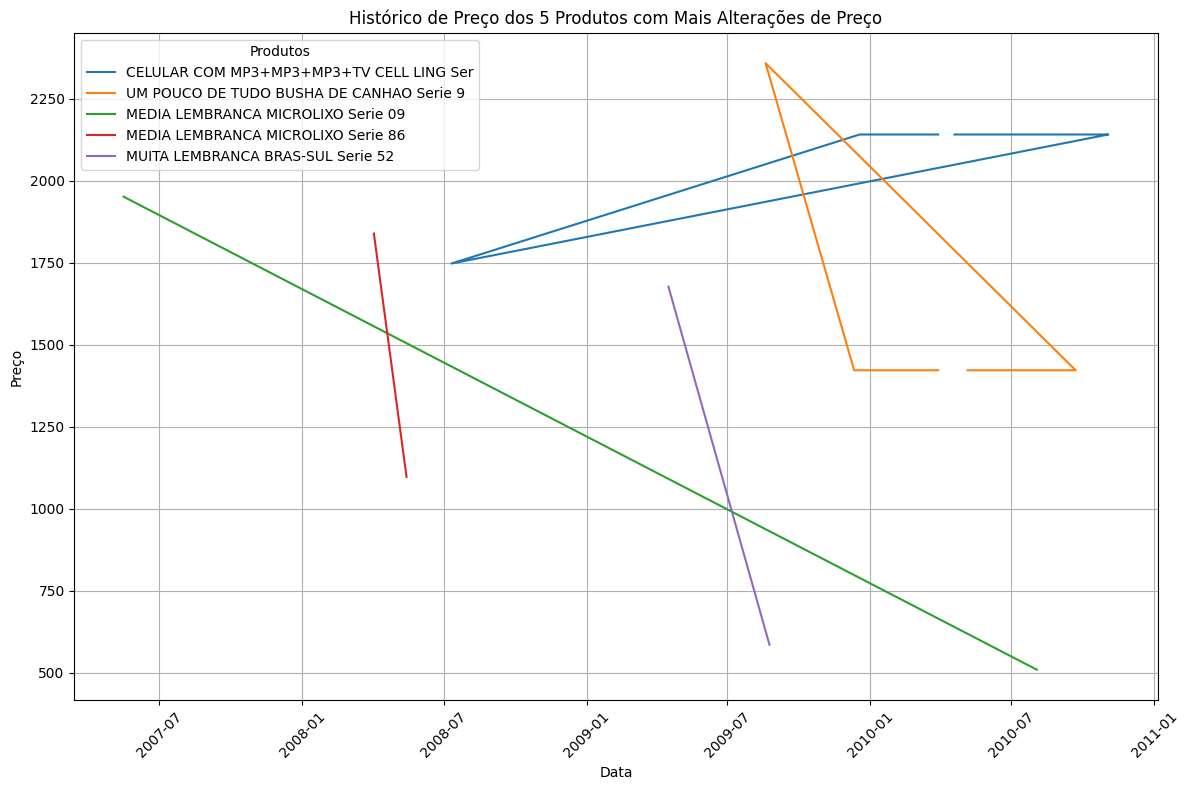

In [686]:
# Passo 1: Identificar os produtos que mais tiveram alterações de preço
# Agrupa por produto e conta as mudanças de preço
df['preco_alterado'] = df.groupby('nm_produto')['preco_liq'].diff().fillna(0) != 0
alteracoes_de_preco = df[df['preco_alterado']].groupby('nm_produto')['preco_alterado'].count()

# Seleciona os 5 produtos com mais alterações de preço
top_5_produtos = alteracoes_de_preco.nlargest(5).index

# Filtra o DataFrame para conter apenas os dados desses produtos
df_top_5 = df[df['nm_produto'].isin(top_5_produtos)].copy()

# Passo 2: Preparar o gráfico
plt.figure(figsize=(12, 8))

# Loop para cada um dos 5 produtos e plotar o histórico de preço
for produto in top_5_produtos:
    dados_produto = df_top_5[df_top_5['nm_produto'] == produto]
    plt.plot(dados_produto['data_pedido'], dados_produto['preco_liq'], label=produto)

# Passo 3: Customizar e exibir o gráfico
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Histórico de Preço dos 5 Produtos com Mais Alterações de Preço')
plt.legend(title="Produtos")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Estudo Clientes

In [687]:
#quantos clientes?
num_clientes = df['cd_cliente'].nunique()
num_clientes

178

In [688]:
#uf e cidade se refere ao cliente? Sim!
# Agrupa por cliente e cidade, contando o número de cidades diferentes por cliente
clientes_por_cidade = df.groupby('cd_cliente')['cidade'].nunique()

# Filtra para mostrar apenas clientes que aparecem em mais de uma cidade
clientes_multiplas_cidades = clientes_por_cidade[clientes_por_cidade > 1]

# Conta o número de clientes que aparecem em mais de uma cidade
numero_de_clientes_multiplas_cidades = clientes_multiplas_cidades.count()

# Exibe a lista de clientes que aparecem em mais de uma cidade
clientes_multiplas_cidades_detalhes = df[df['cd_cliente'].isin(clientes_multiplas_cidades.index)]

# Exibe o resultado
print(f"Total de clientes que estão em mais de uma cidade: {numero_de_clientes_multiplas_cidades}")
print(clientes_multiplas_cidades_detalhes[['cd_cliente', 'nm_cliente', 'cidade']].drop_duplicates())

# Agrupa por cliente e conta o número de cidades distintas associadas a cada cliente
clientes_por_cidade = df.groupby('cd_cliente')['cidade'].nunique()

# Filtra para encontrar clientes que aparecem em exatamente uma cidade
clientes_uma_cidade = clientes_por_cidade[clientes_por_cidade == 1]

# Conta o número de clientes que aparecem em apenas uma cidade
numero_de_clientes_uma_cidade = clientes_uma_cidade.count()

# Exibe o número de clientes que estão em apenas uma cidade
print(f"Total de clientes que estão em apenas uma cidade: {numero_de_clientes_uma_cidade}")



Total de clientes que estão em mais de uma cidade: 0
Empty DataFrame
Columns: [cd_cliente, nm_cliente, cidade]
Index: []
Total de clientes que estão em apenas uma cidade: 178


In [689]:
#OUTLIER cliente com pedidos_por_cliente = 331 *248
# Substitua `numero_de_compras_desejado` pelo número de compras que você quer filtrar
numero_de_compras_desejado = 331

# Agrupa pelo código do cliente e conta o número de compras
compras_por_cliente = df.groupby('cd_cliente')['nota'].count()
"""
# Filtra os clientes que têm o número desejado de compras
clientes_com_numero_especifico_de_compras = compras_por_cliente[compras_por_cliente == numero_de_compras_desejado]

# Exibe os clientes e o número de compras correspondente
print(clientes_com_numero_especifico_de_compras)

# Filtra o DataFrame para ignorar o cliente 4.0
df_filtrado = df[df['cd_cliente'] != 4.0]#erro? 
#df_filtrado = df[df['cd_cliente'] != 4.0]"""

# Define o número de compras a ser filtrado
numero_de_compras_desejado = 331

# Identifica os clientes que têm exatamente 331 compras
clientes_com_331_compras = compras_por_cliente[compras_por_cliente == numero_de_compras_desejado].index

# Filtra o DataFrame original, excluindo as linhas dos clientes com 331 compras
df_filtrado = df[~df['cd_cliente'].isin(clientes_com_331_compras)]

# Exibe o DataFrame filtrado
#print(df_filtrado)

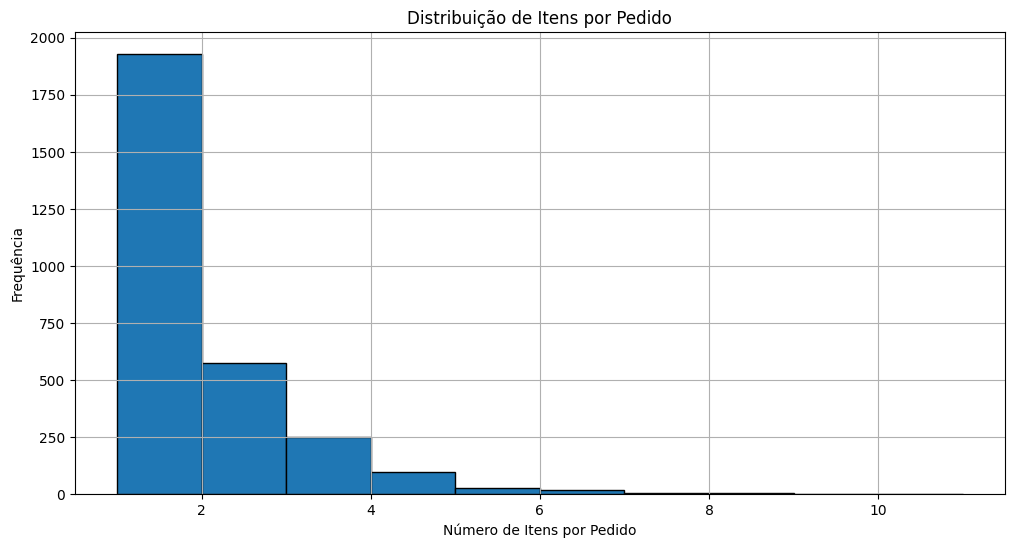

cd_produto
1     1928
2      573
3      252
4       98
5       29
6       17
8        5
7        5
9        3
10       1
Name: count, dtype: int64


In [690]:
#Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
plt.figure(figsize=(12, 6))
plt.hist(itens_por_pedido, bins=range(1, itens_por_pedido.max() + 2), edgecolor='k')
plt.xlabel('Número de Itens por Pedido')
plt.ylabel('Frequência')
plt.title('Distribuição de Itens por Pedido')
plt.grid(alpha=1)
plt.show()
print(itens_por_pedido.value_counts())

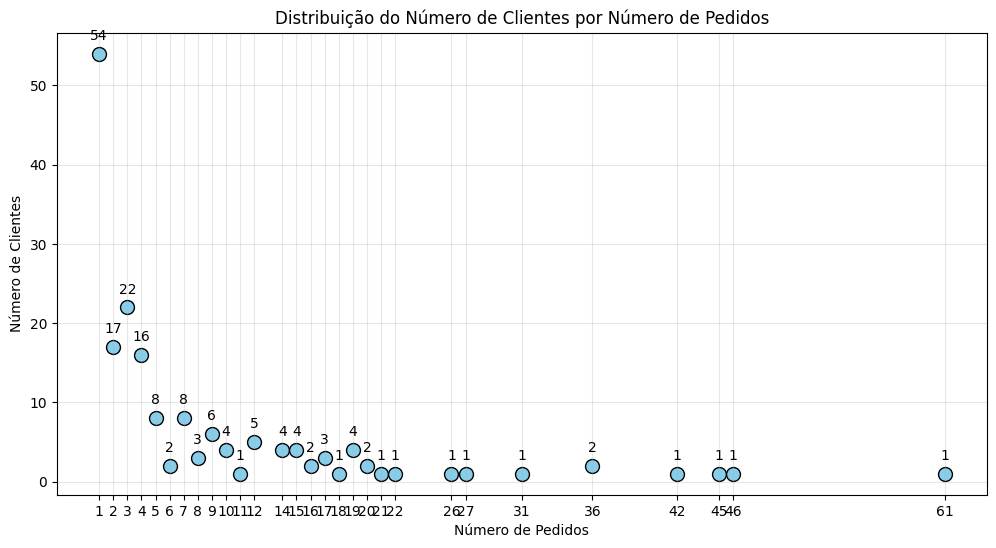

Total de clientes antes do filtro: 178
Total de clientes após o filtro: 177
Clientes e o número de pedidos que cada um fez:
cd_cliente
50.0     61
68.0     46
78.0     45
8.0      42
73.0     36
149.0    36
12.0     31
27.0     27
7.0      26
75.0     22
40.0     21
116.0    20
103.0    20
88.0     19
194.0    19
71.0     19
36.0     19
117.0    18
85.0     17
55.0     17
Name: nota, dtype: int64


Clientes que fizeram exatamente 10 pedidos:
cd_cliente
72.0     10
122.0    10
174.0    10
200.0    10
Name: nota, dtype: int64


In [691]:
# Agrupa por cliente e nota (pedido), e conta o número de pedidos únicos por cliente
pedidos_por_cliente = df_filtrado.groupby('cd_cliente')['nota'].nunique()

# Conta quantos clientes fizeram 1, 2, 3... pedidos
clientes_por_numero_de_pedidos = pedidos_por_cliente.value_counts().sort_index()

# Cria um gráfico de dispersão para mostrar o número de pedidos por cliente
plt.figure(figsize=(12, 6))
plt.scatter(clientes_por_numero_de_pedidos.index, clientes_por_numero_de_pedidos.values, color='skyblue', edgecolor='black', s=100)
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.title('Distribuição do Número de Clientes por Número de Pedidos')
plt.xticks(clientes_por_numero_de_pedidos.index)  # Adiciona os ticks do eixo x
plt.grid(alpha=0.3)

# Adiciona anotações para melhorar a compreensão
for i, txt in enumerate(clientes_por_numero_de_pedidos.values):
    plt.annotate(txt, (clientes_por_numero_de_pedidos.index[i], clientes_por_numero_de_pedidos.values[i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.show()

# Exibe contagens adicionais para verificação
print("Total de clientes antes do filtro:", df['cd_cliente'].nunique())
print("Total de clientes após o filtro:", df_filtrado['cd_cliente'].nunique())

# Exibe os primeiros clientes e o número de pedidos únicos que cada um fez
print("Clientes e o número de pedidos que cada um fez:")
print(pedidos_por_cliente.sort_values(ascending=False).head(20))  # Exibe os 20 maiores clientes
print("\n")

# Exibe os clientes com um número específico de pedidos (como exemplo, 10 pedidos)
numero_de_pedidos_desejado = 10
clientes_com_x_pedidos = pedidos_por_cliente[pedidos_por_cliente == numero_de_pedidos_desejado]
print(f"Clientes que fizeram exatamente {numero_de_pedidos_desejado} pedidos:")
print(clientes_com_x_pedidos)


In [692]:
"""#df_pessoa = df['nm_cliente'].value_counts()
df_pessoa = df[df_pessoa.value_counts() > 50]
df_pessoa = df_pessoa.head(20)
df_pessoa.info()"""
# Conta o número de compras por cliente
compras_por_cliente = df['cd_cliente'].value_counts()

# Seleciona apenas os clientes que fizeram mais de 50 compras
clientes_mais_de_50 = compras_por_cliente[compras_por_cliente > 50]

# Exibe as informações dos 20 primeiros clientes que compraram mais de 50 coisas
df_pessoa = df[df['cd_cliente'].isin(clientes_mais_de_50.index)]
#print(df_pessoa.head(20))
#df_pessoa.info()

C:\Users\henri\AppData\Local\Temp\ipykernel_22108\451517193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pessoa['data_pedido'] = pd.to_datetime(df_pessoa['data_pedido'])
C:\Users\henri\AppData\Local\Temp\ipykernel_22108\451517193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pessoa['mes_ano'] = df_pessoa['data_pedido'].dt.to_period('M')


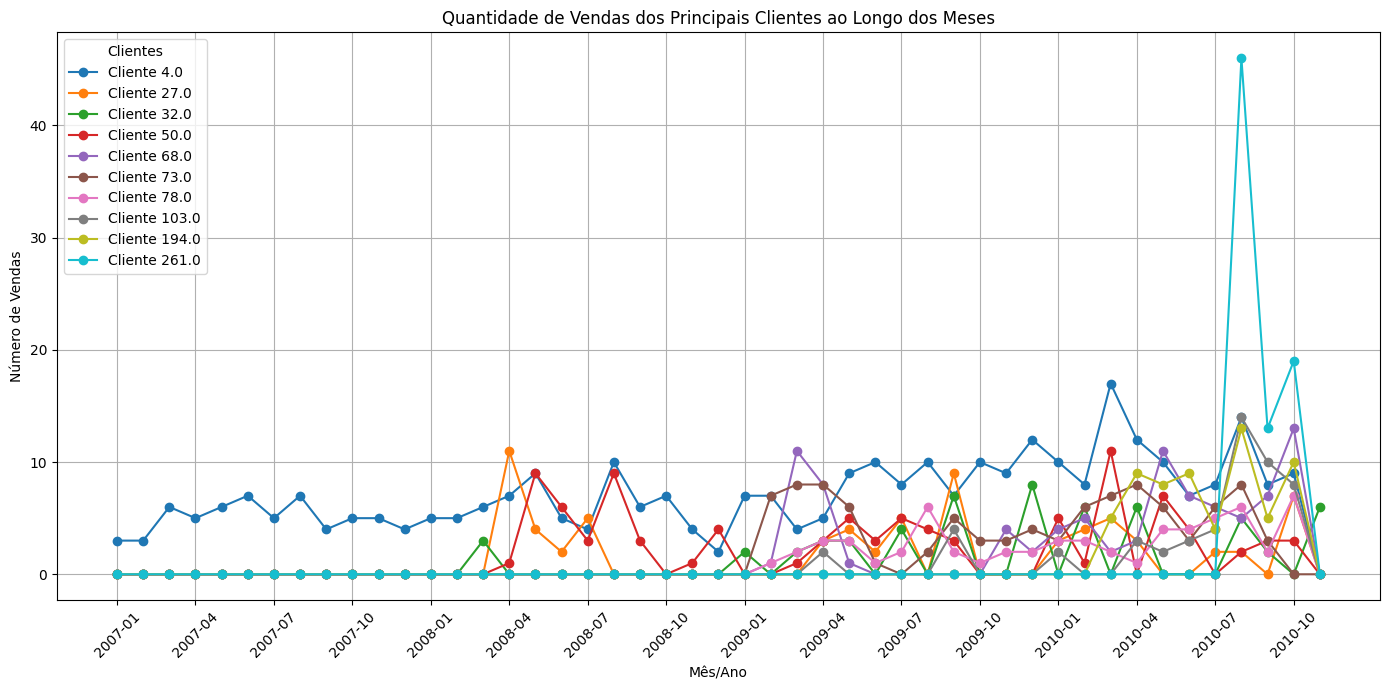

47


In [693]:
# Certifique-se de que a coluna 'data_pedido' esteja em formato datetime
df_pessoa['data_pedido'] = pd.to_datetime(df_pessoa['data_pedido'])

# Cria uma coluna 'mes_ano' para agrupar por mês/ano
df_pessoa['mes_ano'] = df_pessoa['data_pedido'].dt.to_period('M')

# Filtra os 10 clientes que mais compraram em `df_pessoa`
top_clientes = df_pessoa['cd_cliente'].value_counts().nlargest(10).index
df_pessoa_filtrado = df_pessoa[df_pessoa['cd_cliente'].isin(top_clientes)]

# Agrupa os dados de df_pessoa por mês e cliente, contando o número de vendas (notas)
vendas_por_cliente = df_pessoa_filtrado.groupby(['mes_ano', 'cd_cliente'])['nota'].count().unstack(fill_value=0)

# Cria o gráfico de linhas com os dados de vendas por cliente ao longo dos meses
plt.figure(figsize=(14, 7))
for cliente in vendas_por_cliente.columns:
    plt.plot(vendas_por_cliente.index.astype(str), vendas_por_cliente[cliente], marker='o', label=f'Cliente {cliente}')

plt.xlabel('Mês/Ano')
plt.ylabel('Número de Vendas')
plt.title('Quantidade de Vendas dos Principais Clientes ao Longo dos Meses')

# Define a quantidade de ticks do eixo X para melhorar a visualização
num_ticks = 12  # Ajuste o número de ticks desejado
plt.xticks(
    ticks=range(0, len(vendas_por_cliente.index), max(1, len(vendas_por_cliente.index) // num_ticks)), 
    labels=vendas_por_cliente.index.astype(str)[::max(1, len(vendas_por_cliente.index) // num_ticks)], 
    rotation=45
)

plt.legend(title='Clientes')
plt.grid()
plt.tight_layout()
plt.show()
print(vendas_por_cliente.value_counts().sum())


### o chat disse
O gráfico que criamos exibe o número de pedidos (compras) que cada cliente realizou ao longo dos meses, e não necessariamente a quantidade de itens comprados. Em outras palavras, ele conta o número de transações ou pedidos feitos, independentemente da quantidade de produtos em cada pedido.

Para exibir a quantidade total de itens comprados por cliente ao longo do tempo, precisaríamos somar a quantidade de itens em cada pedido. Se houver uma coluna no seu DataFrame que indique o número de itens comprados em cada pedido (por exemplo, uma coluna chamada quantidade_itens), poderíamos fazer o ajuste para exibir o total de itens comprados.

Caso precise disso, posso ajudar a ajustar o código para somar as quantidades de produtos comprados ao longo dos meses.

In [694]:
#Quanto tempo as pessoas esperam até fazer outro pedido?

"""# Ordena os dados pelo cliente e pela data do pedido para calcular o tempo entre pedidos
df_filtrado = df_filtrado.sort_values(by=['cd_cliente', 'data_pedido'])

# Calcula o intervalo de dias entre cada pedido para cada cliente
df_filtrado['dias_entre_pedidos'] = df_filtrado.groupby('cd_cliente')['data_pedido'].diff().dt.days

# Remove valores nulos resultantes dos primeiros pedidos de cada cliente (onde não há um pedido anterior para comparar)
df_dias_entre_pedidos = df_filtrado['dias_entre_pedidos'].dropna()

# Cria um histograma para visualizar a distribuição dos intervalos de tempo entre pedidos
plt.figure(figsize=(10, 6))
plt.hist(df_dias_entre_pedidos, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Dias entre Pedidos')
plt.ylabel('Número de Clientes')
plt.title('Distribuição do Tempo de Espera entre Pedidos')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print(df_dias_entre_pedidos.value_counts())
print(df_dias_entre_pedidos)"""

"# Ordena os dados pelo cliente e pela data do pedido para calcular o tempo entre pedidos\ndf_filtrado = df_filtrado.sort_values(by=['cd_cliente', 'data_pedido'])\n\n# Calcula o intervalo de dias entre cada pedido para cada cliente\ndf_filtrado['dias_entre_pedidos'] = df_filtrado.groupby('cd_cliente')['data_pedido'].diff().dt.days\n\n# Remove valores nulos resultantes dos primeiros pedidos de cada cliente (onde não há um pedido anterior para comparar)\ndf_dias_entre_pedidos = df_filtrado['dias_entre_pedidos'].dropna()\n\n# Cria um histograma para visualizar a distribuição dos intervalos de tempo entre pedidos\nplt.figure(figsize=(10, 6))\nplt.hist(df_dias_entre_pedidos, bins=30, color='skyblue', edgecolor='black', alpha=0.7)\nplt.xlabel('Dias entre Pedidos')\nplt.ylabel('Número de Clientes')\nplt.title('Distribuição do Tempo de Espera entre Pedidos')\nplt.grid(axis='y', alpha=0.3)\nplt.tight_layout()\nplt.show()\nprint(df_dias_entre_pedidos.value_counts())\nprint(df_dias_entre_pedidos)

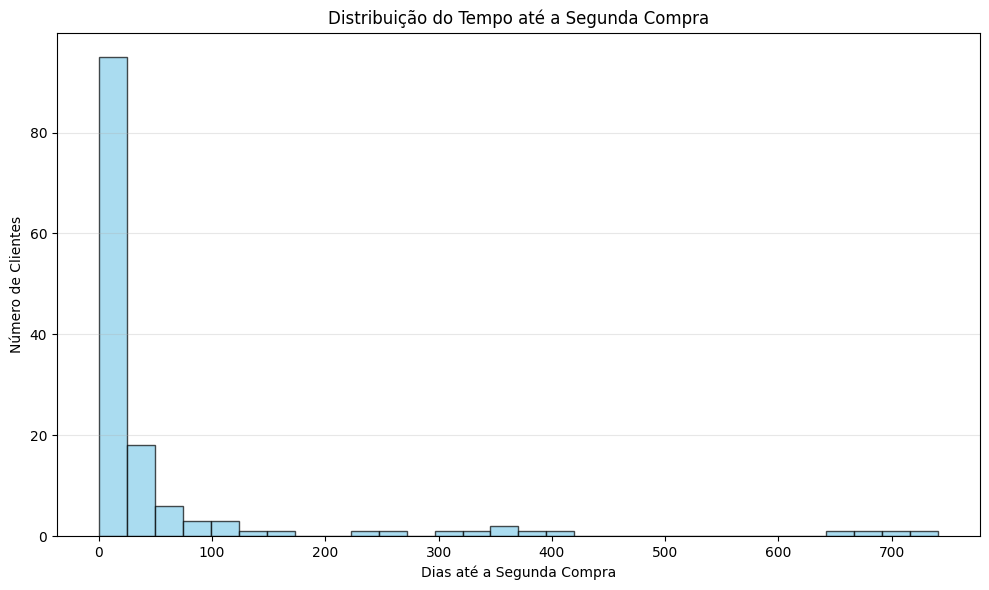

In [695]:
# Ordena os dados por cliente e data do pedido
df_filtrado = df_filtrado.sort_values(by=['cd_cliente', 'data_pedido'])

# Calcula o tempo até a segunda compra para cada cliente, considerando o intervalo entre o primeiro e o segundo pedido
# Seleciona apenas a diferença para o segundo pedido de cada cliente
primeira_para_segunda_compra = (
    df_filtrado.groupby('cd_cliente')
    .apply(lambda x: x['data_pedido'].iloc[1] - x['data_pedido'].iloc[0] if len(x) > 1 else None)
    .dropna()
    .dt.days  # Converte para dias
)

# Cria um histograma para visualizar a distribuição do tempo até a segunda compra
plt.figure(figsize=(10, 6))
plt.hist(primeira_para_segunda_compra, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Dias até a Segunda Compra')
plt.ylabel('Número de Clientes')
plt.title('Distribuição do Tempo até a Segunda Compra')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [696]:
"""# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Gráfico de densidade para dias desde a primeira compra (em azul)
sns.kdeplot(df_filtrado['dias_desde_primeira_compra'].dropna(), color='blue', fill=True, label='Desde Primeira Compra')

# Gráfico de densidade para dias desde a última compra (em vermelho)
sns.kdeplot(df_filtrado['dias_desde_ultima_compra'].dropna(), color='red', fill=True, label='Desde Última Compra')

# Adiciona título e legendas
plt.xlabel("Dias de Espera")
plt.ylabel("Densidade")
plt.title("Densidade do Tempo de Espera até Próximo Pedido")
plt.legend()
plt.grid(alpha=0.3)

# Exibe o gráfico
plt.show()"""

'# Define o tamanho da figura\nplt.figure(figsize=(12, 6))\n\n# Gráfico de densidade para dias desde a primeira compra (em azul)\nsns.kdeplot(df_filtrado[\'dias_desde_primeira_compra\'].dropna(), color=\'blue\', fill=True, label=\'Desde Primeira Compra\')\n\n# Gráfico de densidade para dias desde a última compra (em vermelho)\nsns.kdeplot(df_filtrado[\'dias_desde_ultima_compra\'].dropna(), color=\'red\', fill=True, label=\'Desde Última Compra\')\n\n# Adiciona título e legendas\nplt.xlabel("Dias de Espera")\nplt.ylabel("Densidade")\nplt.title("Densidade do Tempo de Espera até Próximo Pedido")\nplt.legend()\nplt.grid(alpha=0.3)\n\n# Exibe o gráfico\nplt.show()'

In [697]:
#Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
"""
# Cria a coluna que verifica se o produto foi pedido novamente
df['produto_pedido_novamente'] = df.duplicated(subset=['cd_cliente', 'cd_produto'], keep='first')
reordered_orders = df[df['produto_pedido_novamente'] == 1]
top_produtos_repetidos = reordered_orders['cd_produto'].value_counts().head(20)
top_produtos_repetidos = pd.merge(top_produtos_repetidos, df, left_index=True, right_on='cd_produto')
print(top_produtos_repetidos[['cd_produto', 'nm_produto']].value_counts())"""


# Cria a coluna que verifica se o produto foi pedido novamente
df['produto_pedido_novamente'] = df.duplicated(subset=['cd_cliente', 'cd_produto'], keep='first')

# Filtra para os pedidos repetidos
reordered_orders = df[df['produto_pedido_novamente']]

# Conta os 20 produtos mais incluídos em pedidos repetidos
top_produtos_repetidos = reordered_orders['cd_produto'].value_counts().head(20)

# Seleciona os nomes dos produtos correspondentes usando um join sem duplicações
top_produtos_repetidos_df = df[['cd_produto', 'nm_produto']].drop_duplicates()
top_produtos_repetidos_df = top_produtos_repetidos_df[top_produtos_repetidos_df['cd_produto'].isin(top_produtos_repetidos.index)]

# Exibe os 20 principais produtos com seus nomes
print(top_produtos_repetidos_df[['cd_produto', 'nm_produto']])


     cd_produto                                nm_produto
0          1748           ATE 50 LITROS PRADARIA Serie 78
1          1749         MUITA LEMBRANCA IMPERION Serie 78
5          3961            MEDIA LEMBRANCA SISNE Serie 99
6          4459              COM RELOGIO CLARION Serie 49
8          1390           UM POUCO DE TUDO PLUGS Serie 42
12         2817        MEDIA LEMBRANCA MICROLIXO Serie 84
26         3318           PRETO DO BISAVO TELESP Serie 35
28         3321           ATE 20 LITROS BRASTEMP Serie 35
30         2818         ALGUMA LEMBRANCA ITAUTEC Serie 85
31         3823  CELULAR COM MP3+MP3+MP3+TV Nokia Serie 8
32         3822       COM RELOGIO CONSORTE FUNCA Serie 85
54         3819         MUITA LEMBRANCA GRAMPOLA Serie 85
61         3319                 VENTOSO VENTILVA Serie 35
71         2962          IMAGEM NORMAL MONTVELHO Serie 99
73         4819            MEDIA LEMBRANCA SISNE Serie 85
87         4961             MEDIA LEMBRANCA DELL Serie 99
94         331

In [698]:
#Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
# Conta o total de pedidos por cliente
pedidos_contados = df.groupby('cd_cliente')['nota'].count()

# Conta o número de pedidos repetidos por cliente
pedidos_repetidos_contados = df[df['produto_pedido_novamente'] == 1].groupby('cd_cliente')['nota'].count()

# Calcula a proporção de pedidos repetidos para cada cliente
proporcao_de_pedidos_repetidos = pedidos_repetidos_contados / pedidos_contados
proporcao_de_pedidos_repetidos = proporcao_de_pedidos_repetidos.sort_values(ascending=False)
# Exibe a proporção de pedidos repetidos para cada cliente
print("Proporção de pedidos repetidos por cliente:")
print(proporcao_de_pedidos_repetidos.fillna(0))  # Preenche com 0 onde não houver pedidos repetidos


Proporção de pedidos repetidos por cliente:
cd_cliente
174.0    0.900000
149.0    0.897436
33.0     0.888889
146.0    0.866667
86.0     0.823529
220.0    0.800000
26.0     0.800000
4.0      0.785498
115.0    0.750000
195.0    0.750000
198.0    0.750000
1.0      0.750000
13.0     0.750000
22.0     0.727273
120.0    0.722222
194.0    0.714286
37.0     0.714286
200.0    0.687500
85.0     0.684211
132.0    0.676471
12.0     0.673077
66.0     0.666667
166.0    0.666667
111.0    0.666667
29.0     0.666667
246.0    0.666667
250.0    0.666667
117.0    0.666667
46.0     0.666667
78.0     0.661290
3.0      0.647059
122.0    0.636364
154.0    0.631579
88.0     0.620690
261.0    0.615385
8.0      0.612245
32.0     0.596491
103.0    0.596154
162.0    0.586207
210.0    0.583333
218.0    0.571429
213.0    0.571429
267.0    0.571429
249.0    0.571429
87.0     0.571429
68.0     0.566667
40.0     0.558824
82.0     0.538462
36.0     0.531250
50.0     0.520833
179.0    0.500000
169.0    0.500000
105.0    

In [699]:
"""#Para cada produto, qual parcela de todos os pedidos dele são repetidos?
# Cria a coluna que verifica se o produto foi pedido novamente (se ainda não tiver sido feito)
#df['reordered'] = df.duplicated(subset=['cd_cliente', 'cd_produto'], keep='first')

# Para cada produto, calcula a fração de pedidos que são repetidos
repeated_fraction = df.groupby(['cd_produto', 'nm_produto'])['produto_pedido_novamente'].mean()

# Exibe a fração de pedidos repetidos para cada produto
print(repeated_fraction)"""

"#Para cada produto, qual parcela de todos os pedidos dele são repetidos?\n# Cria a coluna que verifica se o produto foi pedido novamente (se ainda não tiver sido feito)\n#df['reordered'] = df.duplicated(subset=['cd_cliente', 'cd_produto'], keep='first')\n\n# Para cada produto, calcula a fração de pedidos que são repetidos\nrepeated_fraction = df.groupby(['cd_produto', 'nm_produto'])['produto_pedido_novamente'].mean()\n\n# Exibe a fração de pedidos repetidos para cada produto\nprint(repeated_fraction)"

In [700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2433 entries, 0 to 4578
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   cd_produto                  2433 non-null   int64         
 1   qtde                        2433 non-null   int64         
 2   nota                        2433 non-null   int64         
 3   preco_liq                   2433 non-null   float64       
 4   preco_ipi                   2433 non-null   float64       
 5   preco_icms                  2433 non-null   float64       
 6   p_ipi                       2433 non-null   int64         
 7   p_icm                       2433 non-null   int64         
 8   nm_produto                  2433 non-null   object        
 9   cd_cliente                  2433 non-null   float64       
 10  nm_cliente                  2433 non-null   object        
 11  cidade                      2433 non-null   object        
 1

In [701]:
df.head()

,cd_produto,qtde,nota,preco_liq,preco_ipi,preco_icms,p_ipi,p_icm,nm_produto,cd_cliente,...,lucro,mes_ano,dia_da_semana,categoria_produto,data_primeira_compra,data_ultima_compra,dias_desde_primeira_compra,dias_desde_ultima_compra,preco_alterado,produto_pedido_novamente
0,1748,1,1,839.04,914.55,1079.17,9,18,ATE 50 LITROS PRADARIA Serie 78,149.0,...,41.9520,2010-04,Thursday,linha branca,2009-09-15,2010-10-21,198,-203,False,False
1,1749,4,1,839.52,915.08,1079.79,9,18,MUITA LEMBRANCA IMPERION Serie 78,149.0,...,92.2944,2010-04,Thursday,eletronicos,2009-09-15,2010-10-21,198,-203,False,False
2,1748,1,2,839.04,914.55,1079.17,9,18,ATE 50 LITROS PRADARIA Serie 78,145.0,...,41.9520,2010-04,Thursday,linha branca,2009-09-04,2010-10-21,209,-203,False,False
3,1749,4,2,839.52,915.08,1079.79,9,18,MUITA LEMBRANCA IMPERION Serie 78,145.0,...,92.2944,2010-04,Thursday,eletronicos,2009-09-04,2010-10-21,209,-203,False,False
4,4965,2,3,2383.20,2550.02,3009.03,7,18,BONZINHO PRADA Serie 99,141.0,...,428.9760,2010-04,Monday,eletronicos,2009-08-31,2010-10-13,217,-191,False,False


In [702]:
print(df['nm_sub_grupo'].unique())
df = df[df['nm_operacao'] == 'VENDAS']
dfaa = df[df['nm_familia'] == 'CELULAR']
dfaa['nm_marca'].unique()

['ATE 50 LITROS' 'MUITA LEMBRANCA' 'BONZINHO' 'MEDIA LEMBRANCA'
 'COM RELOGIO' 'ALGUMA LEMBRANCA' 'UM POUCO DE TUDO' '+TOUCH+TV'
 'IMAGEM ULTRA' 'PLASTICO MODERNO' 'PRETO DO BISAVO' 'ATE 20 LITROS'
 'CELULAR COM MP3+MP3+MP3+TV' 'VAGA LEMBRANCA' 'COM MP3' 'IMAGEM AVANCADA'
 'IMAGEM NORMAL' 'TORRADORA' 'CONDICIONA AR' 'VENTOSO' 'SEM LEMBRANCA'
 'CELULAR TECLADO' 'CELULAR COM MP3' 'MAIS OU MENOS' 'PLASTICO DA TELESP'
 'CELULAR COM MP3+MP3' 'MOEDORA' 'CELULAR TECLADO+TOUCH' 'BATE' 'RERIGERA'
 'ATE 30 LITROS']


array(['No Tinha', 'CCL', 'TCLixo', 'Compaqto', 'Maca China', 'Pear',
       'Fostonofunca', 'Para Guia', 'Telefones Velhos', 'Fone Older',
       'Eletroradiobras', 'L & G'], dtype=object)

In [703]:
#df.to_csv('exemplo_dados_vendas_eletrodomesticos.csv', index=False, encoding='utf-8')